## Functions

In [136]:
# Function 
function sum_zeta_1(s,nterms)
    x = 0
    for n in 1:nterms
        x = x + (1/n)^s
    end
    return x
end


sum_zeta_1 (generic function with 1 method)

In [137]:
# One-line function
sum_zeta_2(s,nterms) = sum(1/n^s for n=1:nterms)


sum_zeta_2 (generic function with 1 method)

In [138]:
# Test to show that sum_zeta_1 and sum_zeta_2 yield the same result

sum_zeta_1(2,100)-sum_zeta_2(2,100)==0


true

In [139]:
# Keyords 

sum_zeta_3(s;nterms=1000) = sum(1/n^s for n=1:nterms) # as a one-line function with a keyword 

println(sum_zeta_3(2)-sum_zeta_2(2,1000)==0)

println(sum_zeta_3(2)-sum_zeta_2(2,2000)==0)

true
false


In [140]:
# A function with more than one output
function circle(r)
    area = pi*r*r
    circ = 2*pi*r
    return area, circ
end


circle (generic function with 1 method)

In [141]:
output = circle(2.0)   # Check out that the output is a tuple
println("area:", output[1])
println("circunference:", output[2])
typeof(output)

area:12.566370614359172
circunference:12.566370614359172


Tuple{Float64, Float64}

In [142]:
area,circunference = circle(2.0)
println("area:", area)
println("circunference:", circunference)
typeof([area, circunference])

area:12.566370614359172
circunference:12.566370614359172


Vector{Float64} (alias for Array{Float64, 1})

In [143]:
# Some functions can modify their arguments (!)

y = rand(4)
x = sort(y)
sort!(y)
println(sum(y-x)==0)

true


In [144]:
# Anonymous function

function do_something(fun,a,b)
    d = fun(a)-fun(b)
    return d
end
    
   d = do_something(x->x^2,4,2)  

print(d-(4^2-2^2)==0)
        

true

In [145]:
# Another anonymous function 

x = collect(-20:1:20)
findfirst(x->sign(x)>0,x)


22

In [146]:
# Sum of f(x(k)) 
function fun_sum(f,x,N)
    s=0.0
    for k=1:N
        s+=f(x[k])
    end
    return s
end

N = 3
x = collect(1:1:N)
r = fun_sum(x->x.^2,x,N)
println(sum(r-sum(x.^2))==0)

true


## Arrays

In [147]:

# Intializing arrays. First a Matrix

Matrix = [1 2 3; 2 3 4; 3 4 5]

3×3 Base.Matrix{Int64}:
 1  2  3
 2  3  4
 3  4  5

In [148]:
# Now a vector
Vec= [2, 3, 4]

3-element Vector{Int64}:
 2
 3
 4

In [149]:
# A weird vector
Vect = ["cat", "dog", 4, false]

4-element Vector{Any}:
      "cat"
      "dog"
     4
 false

In [150]:
typeof(Vect)

Vector{Any} (alias for Array{Any, 1})

In [151]:
typeof(Vect[1])

String

In [152]:
typeof(Vect[3])

Int64

In [153]:
typeof(Vect[4])

Bool

In [154]:
# Another way of making and array 

v  = [1.0/n^2 for n=1:4] # makes the array 

u =  (1.0/n^2 for n=1:4) # makes the generator 

println(sum(v-1.0.*u)==0)

true


In [155]:
# Undefined arrays

M = 3; N=2
A = Array{Float64}(undef,N,M)

2×3 Base.Matrix{Float64}:
 2.39163e-314  2.39163e-314  2.39163e-314
 2.39163e-314  2.39163e-314  2.39163e-314

In [156]:
M  = Array{Float64}(undef,N)

2-element Vector{Float64}:
 2.2206411196e-314
 2.220640424e-314

In [157]:
O = ones(Float64,3,2)

3×2 Base.Matrix{Float64}:
 1.0  1.0
 1.0  1.0
 1.0  1.0

In [158]:
using LinearAlgebra

μ = 4.0
Matrix = μ*I+zeros(Float64,2,2)

2×2 Base.Matrix{Float64}:
 4.0  0.0
 0.0  4.0

In [159]:
# Element-wise operator .

f(x)= 3*x-1
x = [n for n=0:4]
f.(x) # Applies f element-to-element

5-element Vector{Int64}:
 -1
  2
  5
  8
 11

In [160]:
# Broadcasting 

g(x)=3x^3-2x^2
y1 = g.(x)
y2 = @. 3x^3-2x^2 # Broadcasting . operator 
println(sum(y1-y2)==0)

true


In [161]:
# Slicing etc
A = randn(3,3)

3×3 Base.Matrix{Float64}:
 -0.0765544   0.80755   -0.0974606
 -0.783395    0.738637   1.04795
  0.26818    -1.48543   -2.08473

In [162]:
A[begin],A[end]

(-0.07655443573445057, -2.084731379877521)

In [163]:
A[1:2:end,1:2:end]

2×2 Base.Matrix{Float64}:
 -0.0765544  -0.0974606
  0.26818    -2.08473

In [164]:
# Logical indexing
A = randn(4,4)
A[A.<0.0].=2.0
(A)

4×4 Base.Matrix{Float64}:
 0.761966  2.0       1.47223  2.0
 0.851085  2.0       2.0      2.0
 2.0       0.666181  2.0      2.0
 0.484224  2.0       1.35276  2.0

In [165]:
A = randn(4)
for i in eachindex(A)
    println(i,"    ", A[i])
    end

1    -0.3485420871884008
2    0.6093463970267182
3    0.6247512701887632
4    -0.48850320603998043


In [166]:
# Array Operations (I am using real arrays :).. dot product 

v = randn(10)
u = randn(10)
println(dot(u,v)-sum(u.*v)==0)
println(dot(u,v)-u'*v==0)
println(dot(u,v)-v'*u==0)

true
true
true


In [167]:
# Array Operations - dot product of vectors in the complex case (carefull here)

using LinearAlgebra

v = randn(10)+im*randn(10)
u = randn(10)+im*rand(10)

println( abs(dot(u,v)-sum(conj.(u).*v))<=1.0e-14 )

println( dot(u,v)-u'*v==0 )

println( dot(u,v)-v'*u==0 )


true
true
false


In [168]:
# Solution of Ax = y and the \ operator (you will probably need something more sophysticated when solving
# large inverse problems)

A = randn(3,3)  # Assumes a square and invertible matrix of size 3 x 3
x = rand(3)     
y = A*x
xsol = A\y    # Solves system 
e = x-xsol

error = dot(e,e) # should be very close to zero

println("Q: Is the error really small?  A: ",  error<1.e-16)


Q: Is the error really small?  A: true


In [169]:
# Resizing, concatenating, etc 

v = randn(2)
push!(v,3)  # add 3 to end of vector v
println(v)
u = pop!(v)
println("u:",u)
println("v:",v)

[1.2306192996518246, -0.37446028527115743, 3.0]
u:3.0
v:[1.2306192996518246, -0.37446028527115743]


In [170]:
u = [2 2 3]
v = [2 2 3]
vcat(u,v)

2×3 Base.Matrix{Int64}:
 2  2  3
 2  2  3

In [171]:
hcat(u,v)

1×6 Base.Matrix{Int64}:
 2  2  3  2  2  3

In [172]:
vcat(u,v)-cat(u,v,dims=1)

2×3 Base.Matrix{Int64}:
 0  0  0
 0  0  0

## Tuples, Data Structures etc

In [173]:
# Data structures

# tuple (not an array, elements can have different type)

t=(3,2,"hello")

(3, 2, "hello")

In [174]:
t = (1, 2, 3) # not an array 

(1, 2, 3)

In [175]:
Vec = [t...]  # it is an array now! I think ... is called splat operator 

3-element Vector{Int64}:
 1
 2
 3

In [176]:
[t...]

3-element Vector{Int64}:
 1
 2
 3

In [177]:
# Named tuples
# very important
P = (X=2.0, Y=pi)

(X = 2.0, Y = π)

In [178]:
P.X ,P.Y

(2.0, π)

In [179]:
[P...]

2-element Vector{Float64}:
 2.0
 3.141592653589793

In [180]:
# Simple case of the splat operator 

function my_test(a,b)
    return a+b
end

x = 20; y = -21
P = (x,y)
println("It works: ", my_test(P...)-my_test(x,y)==0)

#my_test(P) will give error

It works: true


In [181]:
keys(P), values(P)

(Base.OneTo(2), (20, -21))

In [182]:
My_Parameters = ( 
a = 2.0,
b = 3.0)


(a = 2.0, b = 3.0)

In [183]:
Q = My_Parameters
Q.a,Q.b


(2.0, 3.0)

In [184]:
My_New_Parameters = (
c= pi/2,
d="Hello")

P = merge(My_Parameters, My_New_Parameters)
values(P)

(2.0, 3.0, 1.5707963267948966, "Hello")

## Dictionaries

In [185]:
# Dictionaries (very important) 

D = Dict("a"=>10, "b"=>pi)

Dict{String, Real} with 2 entries:
  "b" => π
  "a" => 10

In [186]:
for k in D
    println(k)
end

Pair{String, Real}("b", π)
Pair{String, Real}("a", 10)


In [187]:
D["a"],D["b"]

(10, π)

In [188]:
# A value of a Dic can be modified 
D["b"]=pi/2
for k in D
    println(k)
end

Pair{String, Real}("b", 1.5707963267948966)
Pair{String, Real}("a", 10)


## Structures 

In [189]:
# Structures

struct Data_People_SAIG_0
    street::Int
    number::Int
    name::String
    phone::Int
end


P1 = Data_People_SAIG_0(118, 7407,"Mauricio", 4384336)
P2 = Data_People_SAIG_0(223, 1402,"Thomas",   2354232)

Q=(P1,P2)   # This cannot be modified, in other words I can't assign new values to P1 and/or P2

(Data_People_SAIG_0(118, 7407, "Mauricio", 4384336), Data_People_SAIG_0(223, 1402, "Thomas", 2354232))

In [190]:
# Structures
mutable struct Data_People_SAIG
    street::Int
    number::Int
    name::String
    phone::Int
end

P1 = Data_People_SAIG(118, 7407,"Mauricio", 4384336)
P2 = Data_People_SAIG(223, 1402,"Thomas",   2354232)

P = (P1,P2) 
# This one can be modified, and this is why it is called mutable, see below

(Data_People_SAIG(118, 7407, "Mauricio", 4384336), Data_People_SAIG(223, 1402, "Thomas", 2354232))

In [191]:
P[1].name="Gustavo"
P

(Data_People_SAIG(118, 7407, "Gustavo", 4384336), Data_People_SAIG(223, 1402, "Thomas", 2354232))

In [192]:
# A more practical examples for numerical analysis

mutable struct MESH{T<:Real}
    dx::Float64
    dt::Float64
    Nx::Int
    Nt::Int
     a::Array{T}
end

P = MESH(10.0,20.0,10,4,ones(2,2))

function do_something(In,MESH;beta::Float64=100.0)
    dt=MESH.dt
    dx=MESH.dx
    Nx=MESH.Nx
    Nt=MESH.Nt
    return In*2.0*dt/Nt, In*2*dx/Nx, sum(MESH.a)+beta
end

do_something(10,P;beta=-10.0)


(100.0, 20.0, -6.0)

In [193]:
# You can improve the readibility of your code if you use keywords as follows

Base.@kwdef mutable struct Parameters
    Δt :: Float64 = 0.1
    n :: Int64
    m :: Int64
end

P = Parameters(m=50,Δt=2.,n=35)  # Now the used sees the actual names of the variables which can become handy 
P.Δt,P.n,P.m
println(P)
P.n=200  # Can mute because it is a  mutable structure 
println(P)

Parameters(2.0, 35, 50)
Parameters(2.0, 200, 50)


## Easy plotting with package Plots.jl

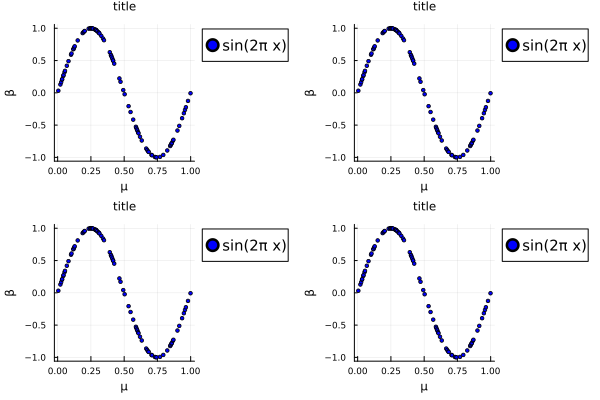

In [194]:
using Plots

x = sort(rand(90));
y = sin.(2π*x);

pp=scatter(   x, y, 
        seriestype=:path,
        linestyle=:dash,
        lw = 2,
        seriescolor = :green,
        marker = :circle,
        markersize = 2,
        markercolor = :blue, 
        title="title",
        xlabel="μ",
        ylabel="β",
        label="sin(2π x)",
        legend=:outertopright,
        titlefontsize=8,
        guidefontsize=8,
        tickfontsize=6,
        legendfontsize=10,
        grid=true
    )
plot(pp,pp,pp,pp, layout = (2,2) )

In [195]:
savefig("p.png")

"/Users/msacchi/Dropbox/p.png"

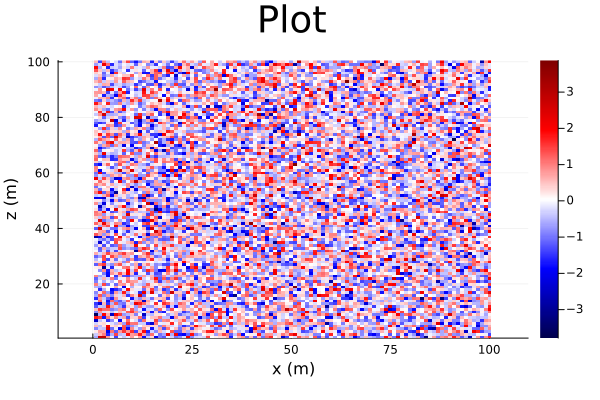

In [196]:
heatmap((randn(100,100)),cmap=:seismic,xlabel="x (m)",ylabel="z (m)",title="Plot",titlefontsize=25,aspectratio=.7)

# You can code as if you were using matlab (almost ignoring types) but it might not be a good idea!

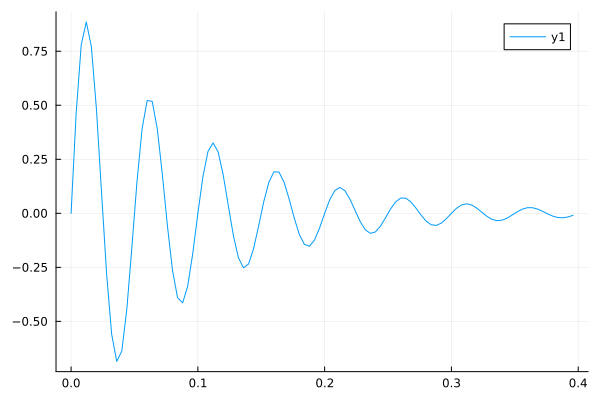

In [197]:
using Plots

# Matlab style.. ingore type  and just code 

function wavelet(f0,dt,alpha,N)
    t = collect(0:1:N-1)*dt
    w = sin.(2*pi*t*f0).*exp.(-alpha*t)
    return t,w
end

plot(wavelet(20,0.004,10,100)...)

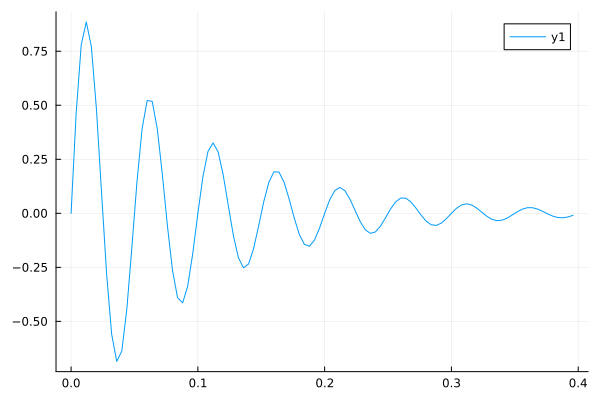

In [199]:
#  Julia style.. try not to ignore type

function wavelet2(f0::Float64,dt::Float64,alpha::Float64,N::Int)
    t = collect(0:1:N-1)*dt
    w = sin.(2*pi*t*f0).*exp.(-alpha*t)
    return t,w
end

#This fails --> plot(wavelet2(20,0.004,10,100.0)...) because first and third args are floats and the last arg should be integer

plot(wavelet2(20.0,0.004,10.0,100)...) 